In [2]:
%pip install spacy
%pip install nltk
%pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
import spacy
from spacy import displacy
import nltk

In [4]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [7]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [8]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['label'])

In [9]:
df

,label,text,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [10]:
df.shape

(5572, 3)

In [11]:
df

,label,text,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [12]:
df.isnull().sum()

label     0
text      0
target    0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 3)

In [17]:
df.columns

Index(['label', 'text', 'target'], dtype='object')

In [18]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

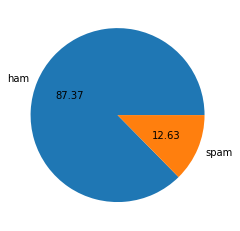

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
df['num_characters'] = df['text'].apply(len)

<ipython-input-21-f0cf0a313c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [22]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-22-308107bd3763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [23]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-23-17fdd65f9b92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [24]:
df

,label,text,target,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,0,125,27,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [28]:
df1 = df.copy()

In [29]:
df1.drop(columns=['text'],inplace=True)

In [30]:
df1.reset_index()

,index,label,target,num_characters,num_words,num_sentences
0,0,ham,0,111,24,2
1,1,ham,0,29,8,2
2,2,spam,1,155,37,2
3,3,ham,0,49,13,1
4,4,ham,0,61,15,1
...,...,...,...,...,...,...
5164,5567,spam,1,161,35,4
5165,5568,ham,0,37,9,1
5166,5569,ham,0,57,15,2
5167,5570,ham,0,125,27,1


In [31]:
df1.describe(include='all')

,label,target,num_characters,num_words,num_sentences
count,5169,5169.000000,5169.000000,5169.000000,5169.000000
unique,2,NaN,NaN,NaN,NaN
top,ham,NaN,NaN,NaN,NaN
freq,4516,NaN,NaN,NaN,NaN
mean,NaN,0.126330,78.977945,18.453279,1.947185
std,NaN,0.332253,58.236293,13.324793,1.362406
min,NaN,0.000000,2.000000,1.000000,1.000000
25%,NaN,0.000000,36.000000,9.000000,1.000000
50%,NaN,0.000000,60.000000,15.000000,1.000000
75%,NaN,0.000000,117.000000,26.000000,2.000000


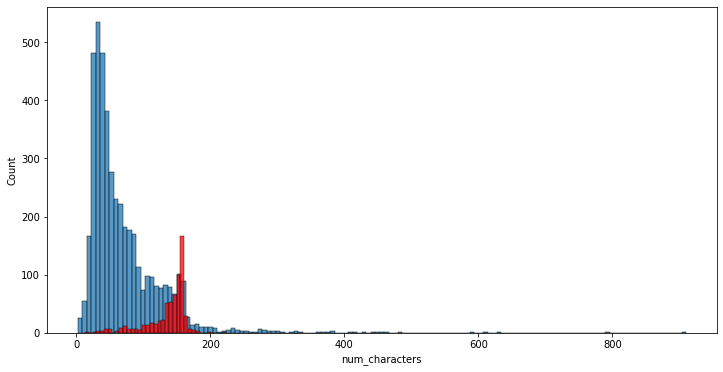

In [32]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

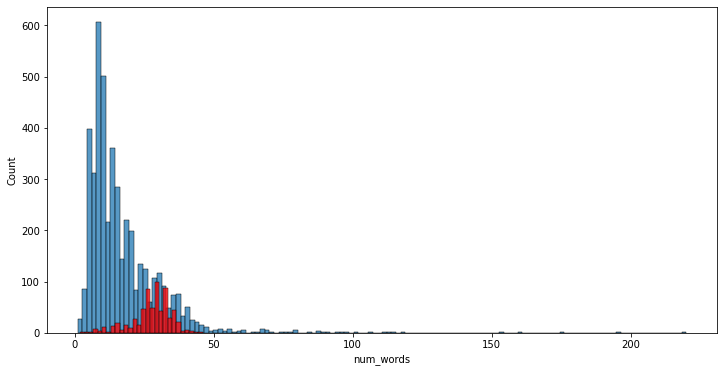

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

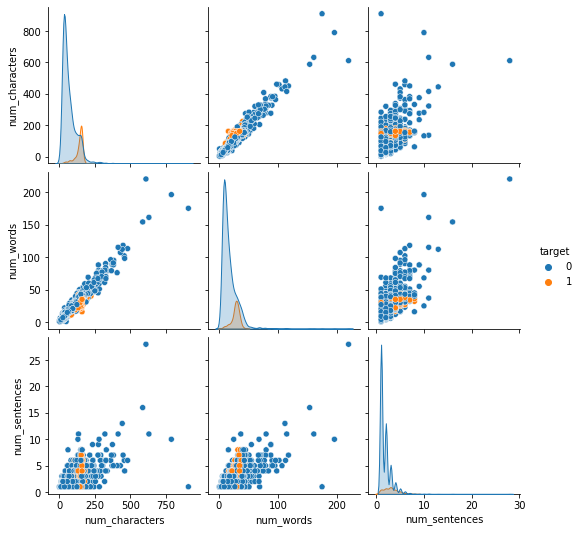

In [34]:
sns.pairplot(df,hue='target')

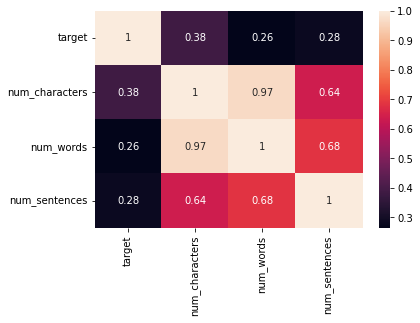

In [35]:
sns.heatmap(df.corr(),annot=True)

In [36]:
>>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
import string
>>> string.punctuation
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [38]:
df['transformed_text'] = df['text'].apply(transform_text)

<ipython-input-38-b507aa02865d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


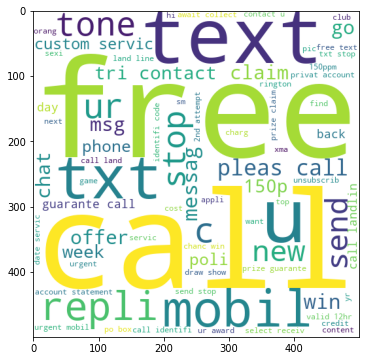

In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

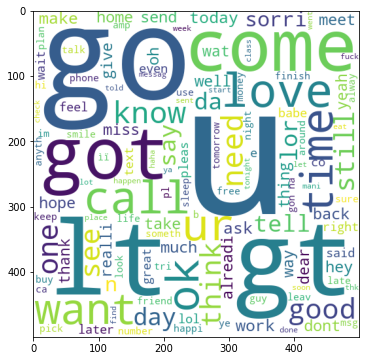

In [40]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [41]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

9939

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


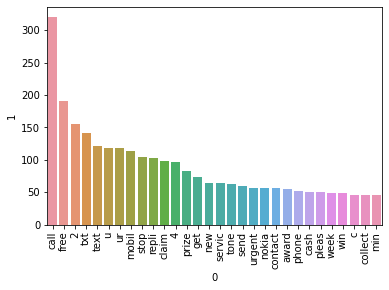

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35394

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


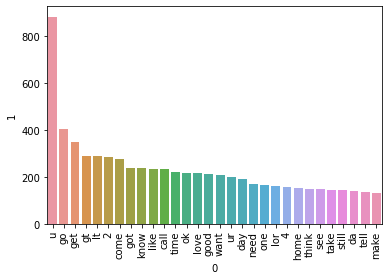

In [44]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tfidf = TfidfVectorizer(max_features=3000)

In [47]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [48]:
X.shape

(5169, 3000)

In [49]:
y = df['target'].values

In [50]:
%pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=2, shuffle=True)
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn import metrics

In [52]:
%pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
knc = KNeighborsClassifier()
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [55]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'GNB': gnb, 
    'BNB': bnb,  
    'MNB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [56]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [57]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9874274661508704
Precision -  0.9758064516129032
For  KN
Accuracy -  0.9148936170212766
Precision -  1.0
For  GNB
Accuracy -  0.8762088974854932
Precision -  0.5064935064935064
For  BNB
Accuracy -  0.988394584139265
Precision -  0.983739837398374
For  MNB
Accuracy -  0.9835589941972921
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.7818181818181819
For  LR
Accuracy -  0.960348162475822
Precision -  0.9326923076923077
For  RF
Accuracy -  0.9845261121856866
Precision -  1.0
For  AdaBoost
Accuracy -  0.965183752417795
Precision -  0.905982905982906
For  BgC
Accuracy -  0.9642166344294004
Precision -  0.8615384615384616
For  ETC
Accuracy -  0.9874274661508704
Precision -  1.0
For  GBDT
Accuracy -  0.9574468085106383
Precision -  0.967741935483871
For  xgb
Accuracy -  0.9526112185686654
Precision -  0.9767441860465116


In [58]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
3,BNB,0.988395,0.983740
0,SVC,0.987427,0.975806
10,ETC,0.987427,1.000000
7,RF,0.984526,1.000000
4,MNB,0.983559,1.000000
8,AdaBoost,0.965184,0.905983
9,BgC,0.964217,0.861538
6,LR,0.960348,0.932692
11,GBDT,0.957447,0.967742
12,xgb,0.952611,0.976744


In [59]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,BNB,Accuracy,0.988395
1,SVC,Accuracy,0.987427
2,ETC,Accuracy,0.987427
3,RF,Accuracy,0.984526
4,MNB,Accuracy,0.983559
5,AdaBoost,Accuracy,0.965184
6,BgC,Accuracy,0.964217
7,LR,Accuracy,0.960348
8,GBDT,Accuracy,0.957447
9,xgb,Accuracy,0.952611


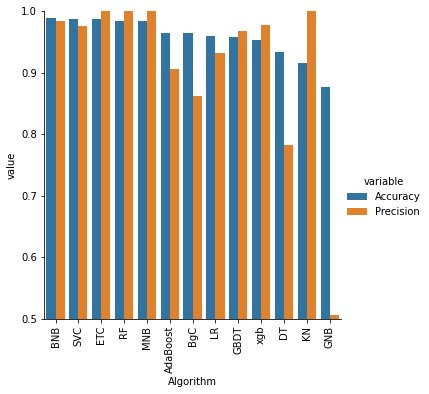

In [60]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [61]:
y_pred1 = mnb.predict(X_test)
print("Multinomial Naive Bayes")
cmatrix_df1 = pd.DataFrame(confusion_matrix(y_test,y_pred1), index=["Actual Not Spam(0)", "Actual Spam(1)"],
                                   columns=["Predicted Not Spam(0)", "Predicted Spam(1)"])
cmatrix_df1

Multinomial Naive Bayes


,Predicted Not Spam(0),Predicted Spam(1)
Actual Not Spam(0),903,0
Actual Spam(1),17,114


In [62]:
report1 = metrics.classification_report(y_test, y_pred1, output_dict=True)
df_classification_report1 = pd.DataFrame(report1).transpose()
df_classification_report1 = df_classification_report1.sort_values(by=['f1-score'], ascending=False)

df_classification_report1

,precision,recall,f1-score,support
0,0.981522,1.000000,0.990675,903.000000
accuracy,0.983559,0.983559,0.983559,0.983559
weighted avg,0.983863,0.983559,0.983065,1034.000000
macro avg,0.990761,0.935115,0.960643,1034.000000
1,1.000000,0.870229,0.930612,131.000000


In [63]:
y_pred2 = bnb.predict(X_test)
print("Binomial Naive Bayes")
cmatrix_df2 = pd.DataFrame(confusion_matrix(y_test,y_pred2), index=["Actual Not Spam(0)", "Actual Spam(1)"],
                                   columns=["Predicted Not Spam(0)", "Predicted Spam(1)"])
cmatrix_df2

Binomial Naive Bayes


,Predicted Not Spam(0),Predicted Spam(1)
Actual Not Spam(0),901,2
Actual Spam(1),10,121


In [64]:
report2 = metrics.classification_report(y_test, y_pred2, output_dict=True)
df_classification_report2 = pd.DataFrame(report2).transpose()
df_classification_report2 = df_classification_report2.sort_values(by=['f1-score'], ascending=False)

df_classification_report2

,precision,recall,f1-score,support
0,0.989023,0.997785,0.993385,903.000000
accuracy,0.988395,0.988395,0.988395,0.988395
weighted avg,0.988354,0.988395,0.988237,1034.000000
macro avg,0.986381,0.960725,0.973070,1034.000000
1,0.983740,0.923664,0.952756,131.000000


In [65]:
y_pred3 = etc.predict(X_test)
print("Extra Trees Classifier")
cmatrix_df3 = pd.DataFrame(confusion_matrix(y_test,y_pred3), index=["Actual Not Spam(0)", "Actual Spam(1)"],
                                   columns=["Predicted Not Spam(0)", "Predicted Spam(1)"])
cmatrix_df3

Extra Trees Classifier


,Predicted Not Spam(0),Predicted Spam(1)
Actual Not Spam(0),903,0
Actual Spam(1),13,118


In [66]:
report3 = metrics.classification_report(y_test, y_pred3, output_dict=True)
df_classification_report3 = pd.DataFrame(report3).transpose()
df_classification_report3 = df_classification_report3.sort_values(by=['f1-score'], ascending=False)

df_classification_report3

,precision,recall,f1-score,support
0,0.985808,1.000000,0.992853,903.000000
accuracy,0.987427,0.987427,0.987427,0.987427
weighted avg,0.987606,0.987427,0.987144,1034.000000
macro avg,0.992904,0.950382,0.970322,1034.000000
1,1.000000,0.900763,0.947791,131.000000


In [67]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('mnb', mnb), ('bnb', bnb), ('etc', etc)], voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()), ('bnb', BernoulliNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [68]:
y_predf = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_predf))
print("Precision",precision_score(y_test,y_predf))

Accuracy 0.9912959381044487
Precision 1.0


In [69]:
from sklearn.ensemble import StackingClassifier
estimators=[('bnb', bnb), ('mnb', mnb), ('etc', etc)]
final_estimator=RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('bnb', BernoulliNB()), ('mnb', MultinomialNB()),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [70]:
y_predff = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_predff))
print("Precision",precision_score(y_test,y_predff))

Accuracy 0.9903288201160542
Precision 0.9689922480620154


In [85]:
txt = input("Enter your text: ")

Enter your text: Congratulations! You’ve won a $500 gift card to Target. Click here to claim your reward.


In [86]:
transformed_m = transform_text(txt)
vector_input = tfidf.transform([transformed_m]).toarray()
result = voting.predict(vector_input)[0]
if result == 1:
    print("Spam")
else:
    print("Not Spam")

Spam


In [87]:
nlp = spacy.load('en_core_web_sm')

In [88]:
doc = nlp(txt)
for word in doc:
    print(word.text,"------>", word.pos_,word.tag_,spacy.explain(word.tag_))

Congratulations ------> NOUN NNS noun, plural
! ------> PUNCT . punctuation mark, sentence closer
You ------> PRON PRP pronoun, personal
’ve ------> AUX VBP verb, non-3rd person singular present
won ------> VERB VBN verb, past participle
a ------> DET DT determiner
$ ------> SYM $ symbol, currency
500 ------> NUM CD cardinal number
gift ------> NOUN NN noun, singular or mass
card ------> NOUN NN noun, singular or mass
to ------> ADP IN conjunction, subordinating or preposition
Target ------> PROPN NNP noun, proper singular
. ------> PUNCT . punctuation mark, sentence closer
Click ------> VERB VB verb, base form
here ------> ADV RB adverb
to ------> PART TO infinitival "to"
claim ------> VERB VB verb, base form
your ------> PRON PRP$ pronoun, possessive
reward ------> NOUN NN noun, singular or mass
. ------> PUNCT . punctuation mark, sentence closer


In [89]:
displacy.render(doc,style='dep',jupyter=True)

In [90]:
%pip install vaderSentiment
%pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiment_dict = sia.polarity_scores(txt)
print("VADER sentiment analysis")
print("Sentence was rated as", sentiment_dict['neg']*100, "% Negative")
print("Sentence was rated as", sentiment_dict['neu']*100, "% Neutral")
print("Sentence was rated as", sentiment_dict['pos']*100, "% Positive")
print("Sentence Overall Rated As", end = " ")
if sentiment_dict['compound'] >= 0.05 :
    print("Positive")

elif sentiment_dict['compound'] <= -0.05 :
    print("Negative")

else :
    print("Neutral")

VADER sentiment analysis
Sentence was rated as 0.0 % Negative
Sentence was rated as 43.2 % Neutral
Sentence was rated as 56.8 % Positive
Sentence Overall Rated As Positive


In [92]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [93]:
encoded_text = tokenizer(txt, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
rneg = scores[0]*100
rneu = scores[1]*100
rpos = scores[2]*100
print("RoBERTa sentiment analysis")
print("Sentence was rated as ", end='')
print("{0:.2f}".format(rneg), "% Negative")
print("Sentence was rated as ", end='')
print("{0:.2f}".format(rneu), "% Neutral")
print("Sentence was rated as ", end='')
print("{0:.2f}".format(rpos), "% Positive")

RoBERTa sentiment analysis
Sentence was rated as 0.08 % Negative
Sentence was rated as 2.74 % Neutral
Sentence was rated as 97.18 % Positive


In [94]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")
sent_pipeline(txt)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9997187256813049}]